In [1]:
from PIL import Image
import numpy as np
import tensorflow as tf
tfe = tf.contrib.eager
tf.enable_eager_execution()

import os
import glob
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

# sns.set(color_codes=True)

seed = 42
np.random.seed(seed)
tf.set_random_seed(seed)


In [6]:
# hidden_dims, output_dims = 64, 64
# conv1 = tf.keras.layers.Conv2D(hidden_dims,kernel_size=5, strides=2,padding="SAME")
# batchnorm1 = tf.keras.layers.BatchNormalization()
# act1 = tf.keras.layers.Activation('relu')
# pool1 = tf.keras.layers.MaxPool2D(pool_size=(2,2))

# conv2 = tf.keras.layers.Conv2D(hidden_dims,kernel_size=3, strides=1,padding="SAME")
# batchnorm2 = tf.keras.layers.BatchNormalization()
# act2 = tf.keras.layers.Activation('relu')
# pool2 = tf.keras.layers.MaxPool2D(pool_size=(2,2))

# conv3 = tf.keras.layers.Conv2D(hidden_dims,kernel_size=3, strides=1,padding="SAME")
# batchnorm3 = tf.keras.layers.BatchNormalization()
# act3 = tf.keras.layers.Activation('relu')
# pool3 = tf.keras.layers.MaxPool2D(pool_size=(2,2))

# conv4 = tf.keras.layers.Conv2D(output_dims,kernel_size=3, strides=1,padding="SAME")
# batchnorm4 = tf.keras.layers.BatchNormalization()
# act4 = tf.keras.layers.Activation('relu')
# pool4 = tf.keras.layers.MaxPool2D(pool_size=(2,2))

# conv5 = tf.keras.layers.Conv2D(output_dims,kernel_size=3, strides=1,padding="SAME")
# batchnorm5 = tf.keras.layers.BatchNormalization()
# act5 = tf.keras.layers.Activation('relu')
# pool5 = tf.keras.layers.MaxPool2D(pool_size=(2,2))

# flatten = tf.keras.layers.Flatten()       
# dense1 = tf.keras.layers.Dense(output_dims)

    
# inp = tf.keras.Input(shape=(84,84,3))
# x = conv1(inp)
# x = batchnorm1(x)
# x = act1(x)
# x = pool1(x)

# x = conv2(x)
# x = batchnorm2(x)
# x = act2(x)
# x = pool2(x)

# x = conv3(x)
# x = batchnorm3(x)
# x = act3(x)
# x = pool3(x)

# x = conv4(x)
# x = batchnorm4(x)
# x = act4(x)
# x = pool4(x)

# x = flatten(x)
# x = dense1(x)
# model = tf.keras.Model(inp,x)
# model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 84, 84, 3)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 42, 42, 64)        4864      
_________________________________________________________________
batch_normalization_15 (Batc (None, 42, 42, 64)        256       
_________________________________________________________________
activation_15 (Activation)   (None, 42, 42, 64)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 21, 21, 64)        36928     
_________________________________________________________________
batch_normalization_16 (Batc (None, 21, 21, 64)        256       
__________

In [2]:
class protoNet(tf.keras.Model):
    def __init__(self, hidden_dims, output_dims):
#     def __init__(self):
        super(protoNet, self).__init__()
#         tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1)),
        self.conv1 = tf.keras.layers.Conv2D(hidden_dims,kernel_size=5, strides=2,padding="SAME")
        self.batchnorm1 = tf.keras.layers.BatchNormalization()
#         self.drop = tf.keras.layers.Dropout(0.25)
        self.act1 = tf.keras.layers.Activation('relu')
        self.pool1 = tf.keras.layers.MaxPool2D(pool_size=(2,2))

        self.conv2 = tf.keras.layers.Conv2D(hidden_dims,kernel_size=3, strides=1,padding="SAME")
        self.batchnorm2 = tf.keras.layers.BatchNormalization()
        self.act2 = tf.keras.layers.Activation('relu')
        self.pool2 = tf.keras.layers.MaxPool2D(pool_size=(2,2))
        
        self.conv3 = tf.keras.layers.Conv2D(hidden_dims,kernel_size=3, strides=1,padding="SAME")
        self.batchnorm3 = tf.keras.layers.BatchNormalization()
        self.act3 = tf.keras.layers.Activation('relu')
        self.pool3 = tf.keras.layers.MaxPool2D(pool_size=(2,2))
        
        self.conv4 = tf.keras.layers.Conv2D(output_dims,kernel_size=3, strides=1,padding="SAME")
        self.batchnorm4 = tf.keras.layers.BatchNormalization()
        self.act4 = tf.keras.layers.Activation('relu')
        self.pool4 = tf.keras.layers.MaxPool2D(pool_size=(2,2))
                
        self.conv5 = tf.keras.layers.Conv2D(output_dims,kernel_size=3, strides=1,padding="SAME")
        self.batchnorm5 = tf.keras.layers.BatchNormalization()
        self.act5 = tf.keras.layers.Activation('relu')
        self.pool5 = tf.keras.layers.MaxPool2D(pool_size=(2,2))
        
        self.flatten = tf.keras.layers.Flatten()       
        self.dense1 = tf.keras.layers.Dense(output_dims)

    
    def forward(self, x):
#         print(x.shape)
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.batchnorm2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.batchnorm3(x)
        x = self.act3(x)
        x = self.pool3(x)
        
        x = self.conv4(x)
        x = self.batchnorm4(x)
        x = self.act4(x)
        x = self.pool4(x)

#         x = self.pool1(self.act1(self.batchnorm1(self.conv1(x))))
#         x = self.pool2(self.act2(self.batchnorm2(self.conv2(x))))
#         x = self.pool3(self.act3(self.batchnorm3(self.conv3(x))))
#         x = self.pool4(self.act4(self.batchnorm4(self.conv4(x))))
        x = self.flatten(x)

        x = self.dense1(x)
        
        return x
    

In [3]:
from PIL import Image, ImageOps, ImageEnhance
import math
from math import floor, ceil
import numpy as np
import os
import random
import warnings




def RotateStandard( image, max_left_rotation, max_right_rotation):
    """
    To perform rotations without automatically cropping the image.

    """

    random_left = random.randint(max_left_rotation, 0)
    random_right = random.randint(0, max_right_rotation)

    left_or_right = random.randint(0, 1)

    rotation = 0

    if left_or_right == 0:
        rotation = random_left
    elif left_or_right == 1:
        rotation = random_right

    return image.rotate(rotation, expand=expand, resample=Image.BICUBIC)

def RotateRange( image, max_left_rotation, max_right_rotation):
    """
    This class is used to perform rotations on image by arbitrary numbers of
    degrees.

    Image are rotated **in place** and an image of the same size is
    returned by this function. That is to say, that after a rotation
    has been performed, the largest possible area of the same aspect ratio
    of the original image is cropped from the skewed image, and this is
    then resized to match the original image size.

    The method by which this is performed is described as follows:

    .. math::

        E = \\frac{\\frac{\\sin{\\theta_{a}}}{\\sin{\\theta_{b}}}\\Big(X-\\frac{\\sin{\\theta_{a}}}{\\sin{\\theta_{b}}} Y\\Big)}{1-\\frac{(\\sin{\\theta_{a}})^2}{(\\sin{\\theta_{b}})^2}}

    which describes how :math:`E` is derived, and then follows
    :math:`B = Y - E` and :math:`A = \\frac{\\sin{\\theta_{a}}}{\\sin{\\theta_{b}}} B`.

    The :ref:`rotating` section describes this in detail and has example
    image to demonstrate this.
    """

    # TODO: Small rotations of 1 or 2 degrees can create black pixels
    random_left = random.randint(max_left_rotation, 0)
    random_right = random.randint(0, max_right_rotation)

    left_or_right = random.randint(0, 1)

    rotation = 0

    if left_or_right == 0:
        rotation = random_left
    elif left_or_right == 1:
        rotation = random_right

    # Get size before we rotate
    x = image.size[0]
    y = image.size[1]

    # Rotate, while expanding the canvas size
    image = image.rotate(rotation, expand=True, resample=Image.BICUBIC)

    # Get size after rotation, which includes the empty space
    X = image.size[0]
    Y = image.size[1]

    # Get our two angles needed for the calculation of the largest area
    angle_a = abs(rotation)
    angle_b = 90 - angle_a

    # Python deals in radians so get our radians
    angle_a_rad = math.radians(angle_a)
    angle_b_rad = math.radians(angle_b)

    # Calculate the sins
    angle_a_sin = math.sin(angle_a_rad)
    angle_b_sin = math.sin(angle_b_rad)

    # Find the maximum area of the rectangle that could be cropped
    E = (math.sin(angle_a_rad)) / (math.sin(angle_b_rad)) * \
        (Y - X * (math.sin(angle_a_rad) / math.sin(angle_b_rad)))
    E = E / 1 - (math.sin(angle_a_rad) ** 2 / math.sin(angle_b_rad) ** 2)
    B = X - E
    A = (math.sin(angle_a_rad) / math.sin(angle_b_rad)) * B

    # Crop this area from the rotated image
    # image = image.crop((E, A, X - E, Y - A))
    image = image.crop((int(round(E)), int(round(A)), int(round(X - E)), int(round(Y - A))))

    # Return the image, re-sized to the size of the image passed originally
    return image.resize((x, y), resample=Image.BICUBIC)


def Resize( image, width, height, resample_filter):
    """This class is used to resize image by absolute values passed as parameters.

    :param resample_filter: The resample filter to use. Must be one of
     the standard PIL types, i.e. ``NEAREST``, ``BICUBIC``, ``ANTIALIAS``,
     or ``BILINEAR``.
    """
    # TODO: Automatically change this to ANTIALIAS or BICUBIC depending on the size of the file
    return image.resize((width, height), eval("Image.%s" % resample_filter))

                        
def Flip( image, top_bottom_left_right):
    """
    Mirror the image according to the `attr`:top_bottom_left_right`
    argument passed to the constructor and return the mirrored image.

    :param top_bottom_left_right: Controls the direction the image should
     be mirrored. Must be one of ``LEFT_RIGHT``, ``TOP_BOTTOM``, or
     ``RANDOM``.

     - ``LEFT_RIGHT`` defines that the image is mirrored along its x axis.
     - ``TOP_BOTTOM`` defines that the image is mirrored along its y axis.
     - ``RANDOM`` defines that the image is mirrored randomly along
       either the x or y axis.

    """

    random_axis = random.randint(0, 1)

    if top_bottom_left_right == "LEFT_RIGHT":
        return image.transpose(Image.FLIP_LEFT_RIGHT)
    elif top_bottom_left_right == "TOP_BOTTOM":
        return image.transpose(Image.FLIP_TOP_BOTTOM)
    elif top_bottom_left_right == "RANDOM":
        if random_axis == 0:
            return image.transpose(Image.FLIP_LEFT_RIGHT)
        elif random_axis == 1:
            return image.transpose(Image.FLIP_TOP_BOTTOM)


def Crop( image, width, height, centre=True):
    """
    Crop an area from an image, either from a random location or centred,
    using the dimensions supplied during instantiation.
    """

    w, h = image.size  # All image must be the same size, so we can just check the first image in the list

    left_shift = random.randint(0, int((w - width)))
    down_shift = random.randint(0, int((h - height)))

    # TODO: Fix. We may want a full crop.
    if width > w or height > h:
        return image

    if centre:
        return image.crop(((w/2)-(width/2), (h/2)-(height/2), (w/2)+(width/2), (h/2)+(height/2)))
    else:
        return image.crop((left_shift, down_shift, width + left_shift, height + down_shift))


def Scale(image, scale_factor):
    """
    This class is used to increase or decrease image in size by a certain
    factor, while maintaining the aspect ratio of the original image.
    """
    w, h = image.size

    new_h = int(h * scale_factor)
    new_w = int(w * scale_factor)

    return image.resize((new_w, new_h), resample=Image.BICUBIC)


def Zoom(image, factor):
    """
    This class is used to enlarge image (to zoom) but to return a cropped
    region of the zoomed image of the same size as the original image.
    """
    factor = round(factor, 2)

    w, h = image.size

    image_zoomed = image.resize((int(round(image.size[0] * factor)),
                                 int(round(image.size[1] * factor))),
                                 resample=Image.BICUBIC)
    w_zoomed, h_zoomed = image_zoomed.size

    new = image_zoomed.crop((floor((float(w_zoomed) / 2) - (float(w) / 2)),
                              floor((float(h_zoomed) / 2) - (float(h) / 2)),
                              floor((float(w_zoomed) / 2) + (float(w) / 2)),
                              floor((float(h_zoomed) / 2) + (float(h) / 2))))
    w_, h_ = new.size
    if w_ == w and h_ == h:
        return new
    else:
        return new.resize((w,h), resample=Image.BICUBIC)
        


def HistogramEqualisation( image):
    """
    Performs histogram equalisation on the image passed as an argument
    and returns the equalised image. There are no user definable
    parameters for this method.
    """
    # If an image is a colour image, the histogram will
    # will be computed on the flattened image, which fires
    # a warning.
    # We may want to apply this instead to each colour channel.
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return ImageOps.equalize(image)



def Greyscale(image):
    """
    This class is used to convert image into greyscale. That is, it converts
    image into having only shades of grey (pixel value intensities)
    varying from 0 to 255 which represent black and white respectively.
    """
    return ImageOps.grayscale(image)

def Invert(image):
    """
    Negates the image passed as an argument. There are no user definable
    parameters for this method.
    """
    return ImageOps.invert(image)

def BlackAndWhite(image, threshold):
    """
    Convert the image passed as an argument to black and white, 1-bit
    monochrome. Uses the :attr:`threshold` passed to the constructor
    to control the cut-off point where a pixel is converted to black or
    white.
    """
    # An alternative would be to use
    # PIL.ImageOps.posterize(image=image, bits=1)
    # but this might be faster.
    image = ImageOps.grayscale(image)
    return image.point(lambda x: 0 if x < threshold else 255, '1')



def Randomfactor(min_factor, max_factor):
    
    factor = np.random.uniform(min_factor, max_factor)
    return factor

def RandomBrightness(image, factor):
    """
    Random change the passed image brightness.
    """
    image_enhancer_brightness = ImageEnhance.Brightness(image)
    return image_enhancer_brightness.enhance(factor)

def RandomColor(image, factor):
    """
    Random change the passed image saturation.
    """
    image_enhancer_color = ImageEnhance.Color(image)
    return image_enhancer_color.enhance(factor)

def RandomContrast(image, factor):
    """
    Random change the passed image contrast.
    """
    image_enhancer_contrast = ImageEnhance.Contrast(image)
    return image_enhancer_contrast.enhance(factor)


def Zoom(image, factor):
    """
    This class is used to enlarge image (to zoom) but to return a cropped
    region of the zoomed image of the same size as the original image.
    """
    factor = round(factor, 2)
    
    w, h = image.size
#     print(w,h)
    image_zoomed = image.resize((int(round(image.size[0] * factor)),
                                 int(round(image.size[1] * factor))),
                                 resample=Image.BICUBIC)
    w_zoomed, h_zoomed = image_zoomed.size
#     print(w_zoomed, h_zoomed)
    new = image_zoomed.crop((floor((float(w_zoomed) / 2) - (float(w) / 2)),
                              floor((float(h_zoomed) / 2) - (float(h) / 2)),
                              floor((float(w_zoomed) / 2) + (float(w) / 2)),
                              floor((float(h_zoomed) / 2) + (float(h) / 2))))
    w_, h_ = new.size
#     print(w_, h_)
    if w_ == w and h_ == h:
        return new
    else:
        return new.resize((w,h), resample=Image.LANCZOS)

In [4]:
n_way = 5
n_shot = 1
n_query = 15
n_examples = 300 # no of exp for each class
im_width, im_height, channels = 84,84,3
h_dim = 64
z_dim = 64


In [5]:
def euclidean_distance(a, b):
    # a.shape = N x D
    # b.shape = M x D
    N, D = tf.shape(a)[0], tf.shape(a)[1]
    M = tf.shape(b)[0]
    a = tf.tile(tf.expand_dims(a, axis=1), (1, M, 1))
    b = tf.tile(tf.expand_dims(b, axis=0), (N, 1, 1))
    return tf.reduce_mean(tf.square(a - b), axis=2)


In [6]:
# from skimage import transform

# def rotate_aug(image, k):
#     image = transform.rotate(image, angle=k, resize=False, center=None, order=1, mode='constant',
#                                   cval=0, clip=True, preserve_range=False)
#     return image

In [8]:
import os
data_dir = '../segment'
os.listdir('../')

['protoNet',
 'ssd',
 'tiny-imagenet',
 'classical-vision',
 'pix2pix',
 'meta_algo',
 'CIFAR10-img-classification-tensorflow',
 'kaggle-c',
 'depth',
 'segment',
 'yolo',
 '.ipynb_checkpoints']

In [9]:
# os.listdir('../'+data_dir)

In [10]:
# data_dir = 'data'
def collect_img_address(data_dir, main_dir):
    data = []
    classes = glob.glob(data_dir + '/' + main_dir + '/*')
    data_cls = []
    for cls in classes:
        images = glob.glob(cls + '/*')
        data_cls.append(images)
    data.append(data_cls)
    return data

data = collect_img_address(data_dir, 'data-ready')
# test = collect_img_address(data_dir, 'test')
# val = collect_img_address(data_dir, 'val')

data = np.array(data).reshape(-1,300)
data.shape

(40, 300)

In [11]:
train = data[:34]
val = data[34:36]
test = data[36:]
train.shape, test.shape, val.shape

((34, 300), (4, 300), (2, 300))

In [12]:

train = np.array(train).reshape(-1,300)
test = np.array(test).reshape(-1,300)
val = np.array(val).reshape(-1,300)
print("classes and its samples for each train, test, val: ")
train.shape, test.shape, val.shape

classes and its samples for each train, test, val: 


((34, 300), (4, 300), (2, 300))

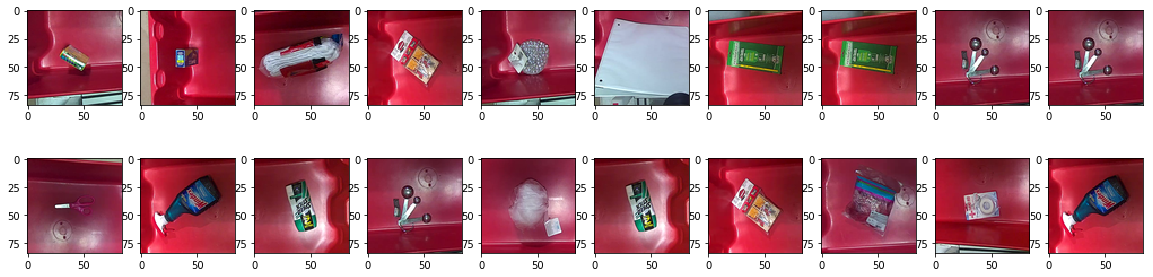

In [11]:
# pick 20 random images from different classes
ids = np.random.randint(0,33,size=(20))
fig, ax = plt.subplots(2,10, figsize=(20,5))
axes = ax.flatten()
for i in range(20):
    axes[i].imshow(Image.open(train[ids[i]][0]))

In [13]:
def get_batch(dataset, n_way, n_shot, n_query):
    n_classes = dataset.shape[0]
    if n_way >= n_classes:
        n_way = n_classes
    epi_classes = np.random.permutation(n_classes)[:n_way]
    support, query = [], []
    for i, epi_cls in enumerate(epi_classes):
        selected = np.random.permutation(n_examples)[:n_shot + n_query]
        s_files = dataset[epi_cls, selected[:n_shot]]
        q_files = dataset[epi_cls, selected[n_shot:]]

    #     print(epi_cls, selected)
        s_data = []
        for file in s_files:
            min_factor = 1
            max_factor = 2
            aug_id = np.random.randint(7)
            img = Image.open(file)
            s_data.append(np.array(img))

            # rotate and fill the empty spae with black pixels
    #         img = RotateRange(temp1, 0,360)
            if aug_id == 0:
                max_left_rotation, max_right_rotation = -20, 20
                im = RotateRange(img, max_left_rotation, max_right_rotation)
                s_data.append(np.array(im))

#             temp = img#np.array(temp)*255.0
#             temp1 = Image.fromarray(np.uint8(temp))
            # histogram equalization 
            if aug_id == 1:
                im = HistogramEqualisation(img)
                s_data.append(np.array(im))

            # flipping left to right
            if aug_id == 2:
                im = Flip(img, "LEFT_RIGHT")
                s_data.append(np.array(im))
                
            if aug_id == 3:
                factor = Randomfactor(min_factor, max_factor)
                im = Zoom(img, factor)
                s_data.append(np.array(im))
                
            if aug_id == 4:
                factor = Randomfactor(min_factor, max_factor)
                im = RandomContrast(img, factor)
                s_data.append(np.array(im))
            
            if aug_id == 5:
                factor = Randomfactor(min_factor, max_factor)
                im = RandomColor(img, factor)
                s_data.append(np.array(im))
            
            if aug_id == 6:
                factor = Randomfactor(min_factor, max_factor)
                im = RandomBrightness(img, factor)
                s_data.append(np.array(im))
                
            if aug_id == 7:
                width, height = img.size
                scale_factor = 2
                im = Scale(img, scale_factor)
                im = im.resize((width, height), resample=Image.LANCZOS)
                s_data.append(np.array(im))


        q_data = []
        for file in q_files:
            min_factor = 1
            max_factor = 2
            aug_id = np.random.randint(7)
            img = Image.open(file)
            q_data.append(np.array(img))
            
            # rotate and fill the empty spae with black pixels
    #         img = RotateRange(temp1, 0,360)
            if aug_id == 0:
                max_left_rotation, max_right_rotation = -20, 20
                im = RotateRange(img, max_left_rotation, max_right_rotation)
                q_data.append(np.array(im))

            # histogram equalization 
            if aug_id == 1:
                im = HistogramEqualisation(img)
                q_data.append(np.array(im))

            # flipping left to right
            if aug_id == 2:
                im = Flip(img, "LEFT_RIGHT")
                q_data.append(np.array(im))
                
            if aug_id == 3:
                min_factor = 1
                max_factor = 2
                factor = Randomfactor(min_factor, max_factor)
                im = Zoom(img, factor)
                q_data.append(np.array(im))
                
            if aug_id == 4:
                factor = Randomfactor(min_factor, max_factor)
                im = RandomContrast(img, factor)
                q_data.append(np.array(im))
            
            if aug_id == 5:
                factor = Randomfactor(min_factor, max_factor)
                im = RandomColor(img, factor)
                q_data.append(np.array(im))
            
            if aug_id == 6:
                factor = Randomfactor(min_factor, max_factor)
                im = RandomBrightness(img, factor)
                q_data.append(np.array(im))
                
            if aug_id == 7:
                width, height = img.size
                scale_factor = 2
                im = Scale(img, scale_factor)
                im = im5.resize((width, height), resample=Image.LANCZOS)
                q_data.append(np.array(im))
                
        support.append(np.array(s_data))
        query.append(np.array(q_data))
#         print(np.array(s_data).shape, np.array(q_data).shape, np.array(s_data).shape[0]+np.array(q_data).shape[0])
        
    support = np.array(support).astype('float')/255.0
    query = np.array(query).astype('float')/255.0
    s_labels = np.tile(np.arange(n_way)[:, np.newaxis], (1, n_shot)).astype(np.uint8)
    q_labels = np.tile(np.arange(n_way)[:, np.newaxis], (1, n_query*2)).astype(np.uint8)
    
#     support = tf.constant(support)
#     query = tf.constant(query)
#     q_labels = tf.constant(q_labels)
    
    return support, query, q_labels#, s_labels

support, query, q_labels = get_batch(train, 10,1,15)
support.shape, query.shape, q_labels.shape#, s_labels.shape

((10, 2, 84, 84, 3), (10, 30, 84, 84, 3), (10, 30))

In [13]:
support[0]

array([[[[0.55686275, 0.0745098 , 0.19215686],
         [0.54509804, 0.06666667, 0.18039216],
         [0.55294118, 0.08627451, 0.19215686],
         ...,
         [0.22745098, 0.30196078, 0.34509804],
         [0.23137255, 0.31372549, 0.34901961],
         [0.23921569, 0.31764706, 0.34901961]],

        [[0.39607843, 0.01960784, 0.10196078],
         [0.38823529, 0.01568627, 0.10588235],
         [0.39607843, 0.03137255, 0.1254902 ],
         ...,
         [0.21960784, 0.29019608, 0.34509804],
         [0.21568627, 0.29803922, 0.34117647],
         [0.22745098, 0.30980392, 0.34509804]],

        [[0.27058824, 0.        , 0.05098039],
         [0.2627451 , 0.        , 0.05098039],
         [0.2627451 , 0.        , 0.05882353],
         ...,
         [0.21568627, 0.2745098 , 0.32941176],
         [0.19607843, 0.2627451 , 0.31372549],
         [0.18431373, 0.25098039, 0.29803922]],

        ...,

        [[0.38039216, 0.01176471, 0.08627451],
         [0.36470588, 0.02352941, 0.09411765]

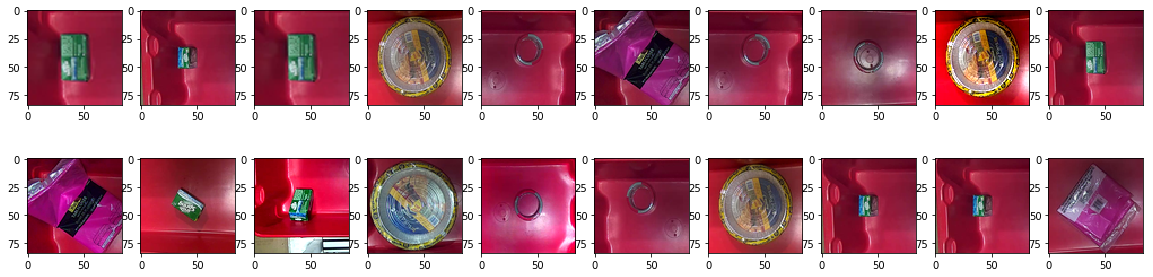

In [15]:
# pick 20 random images from different classes
support, query, q_labels = get_batch(train, 10,5,15)

support = support.reshape(-1,84,84,3)
ids = np.random.randint(0,33,size=(20))
fig, ax = plt.subplots(2,10, figsize=(20,5))
axes = ax.flatten()
for i in range(20):
    axes[i].imshow(support[ids[i]])

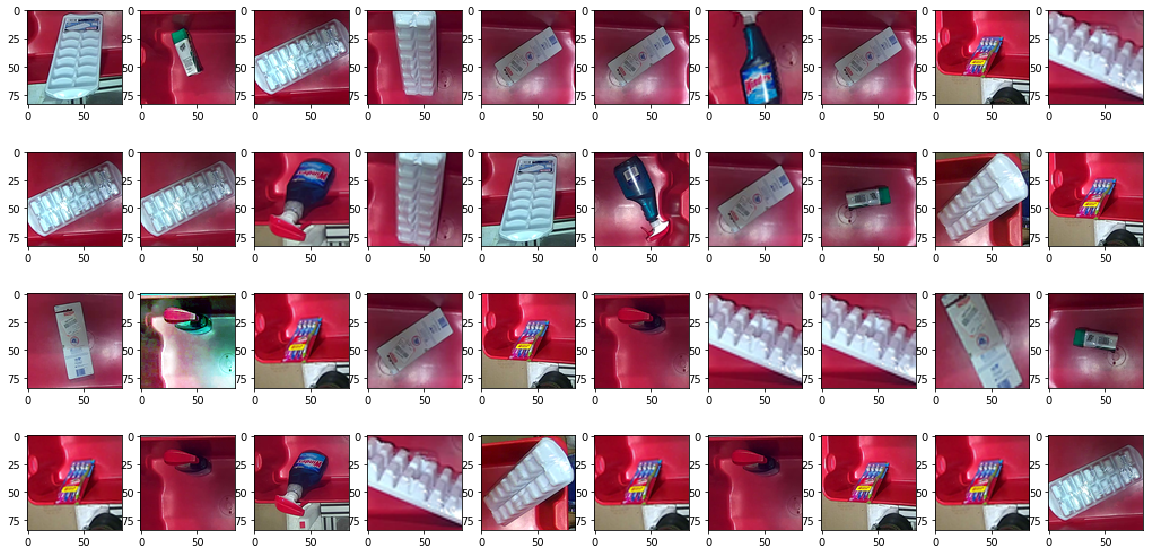

In [16]:
# pick 20 random images from different classes
support, query, q_labels = get_batch(train, 10,5,15)

support = support.reshape(-1,84,84,3)
ids = np.random.randint(0,33,size=(40))
fig, ax = plt.subplots(4,10, figsize=(20,10))
axes = ax.flatten()
for i in range(40):
    axes[i].imshow(support[ids[i]])

In [15]:
support, query, q_labels = get_batch(test, 10,1,15)
support.shape, query.shape, q_labels.shape#, s_labels.shape

((4, 2, 84, 84, 3), (4, 30, 84, 84, 3), (4, 30))

In [16]:

def compute_loss_acc(model, support, query, labels, num_classes, num_support, num_queries, emb_dim):
    num_classes, num_support, num_queries, emb_dim = num_classes, num_support, num_queries, emb_dim
    # num_classes, num_support, num_queries = 5, 1, 1
    d_support = support.reshape(-1,84,84,3)
    d_query = query.reshape(-1,84,84,3)
    labels = labels.reshape(num_classes, num_queries*2)
    y = tf.constant(labels, dtype="int64")
    d_support = tf.constant(d_support, dtype="float32")
    d_query = tf.constant(d_query, dtype="float32")
#     print("checking dtypes: ", d_support.dtype, d_query.dtype, y.dtype)

    emb_x = model.forward(d_support) #(num_classes*num_support, emb_dims)
    #(num_classes,num_support, emb_dims)
    emb_x = tf.reshape(emb_x, [num_classes, num_support*2, emb_dim])
    emb_x = tf.reduce_mean(emb_x, axis=1)#(num_classes, emb_dims)
    emb_q = model.forward(d_query)#(num_classes*num_queries, emb_dims)
    
    dist = euclidean_distance(emb_q, emb_x)#(num_classes*num_queries, num_classes)
    
    #(num_classes, num_queries, num_classes)
    y_one_hot = tf.one_hot(tf.constant(labels), depth=num_classes)
    
    #(num_classes*num_queries, num_classes)
    log_p_y = tf.nn.log_softmax(-dist)
    #(num_classes, num_queries, num_classes)
    log_p_y = tf.reshape(log_p_y, [num_classes,num_queries*2,-1])
    
    ce_loss = -tf.reduce_mean(
        tf.reshape(
            tf.reduce_sum(
                tf.multiply(y_one_hot, log_p_y), #(num_classes, num_queries, num_classes)
                axis=-1), #(num_classes, num_queries)
            [-1]) #(num_classes*num_queries)
    ) #()
#     print(y.shape, y.dtype, log_p_y.shape, log_p_y.dtype)
#     print("argmax", tf.argmax(log_p_y, axis=-1))
    
#     print("y", y)
    acc = tf.reduce_mean(
        tf.to_float(
            tf.equal(
                tf.argmax(log_p_y, axis=-1), 
                y)
        )
    )
    return ce_loss, acc

In [17]:
def compute_loss_acc(model, support, query, labels, num_classes, num_support, num_queries, emb_dim):
    num_classes, num_support, num_queries, emb_dim = num_classes, num_support, num_queries, emb_dim
    # num_classes, num_support, num_queries = 5, 1, 1
    d_support = support.reshape(-1,84,84,3)
    d_query = query.reshape(-1,84,84,3)
#     print(d_support.shape, num_classes)
    if int(d_support.shape[0]/num_classes) < num_classes:
        num_classes = int(d_support.shape[0]/num_classes)
#         print(d_support.shape, num_classes)
    labels = labels.reshape(num_classes, num_queries*2)
    y = tf.constant(labels, dtype="int64")
    d_support = tf.constant(d_support, dtype="float32")
    d_query = tf.constant(d_query, dtype="float32")
#     print("checking dtypes: ", d_support.dtype, d_query.dtype, y.dtype)

    emb_x = model.forward(d_support) #(num_classes*num_support, emb_dims)
    #(num_classes,num_support, emb_dims)
    emb_x = tf.reshape(emb_x, [num_classes, num_support*2, emb_dim])
    emb_x = tf.reduce_mean(emb_x, axis=1)#(num_classes, emb_dims)
    emb_q = model.forward(d_query)#(num_classes*num_queries, emb_dims)
    
    dist = euclidean_distance(emb_q, emb_x)#(num_classes*num_queries, num_classes)
    
    #(num_classes, num_queries, num_classes)
    y_one_hot = tf.one_hot(tf.constant(labels), depth=num_classes)
    
    #(num_classes*num_queries, num_classes)
    log_p_y = tf.nn.log_softmax(-dist)
    #(num_classes, num_queries, num_classes)
    log_p_y = tf.reshape(log_p_y, [num_classes,num_queries*2,-1])
    
    ce_loss = -tf.reduce_mean(
        tf.reshape(
            tf.reduce_sum(
                tf.multiply(y_one_hot, log_p_y), #(num_classes, num_queries, num_classes)
                axis=-1), #(num_classes, num_queries)
            [-1]) #(num_classes*num_queries)
    ) #()
#     print(y.shape, y.dtype, log_p_y.shape, log_p_y.dtype)
#     print("argmax", tf.argmax(log_p_y, axis=-1))
    
#     print("y", y)
    acc = tf.reduce_mean(
        tf.to_float(
            tf.equal(
                tf.argmax(log_p_y, axis=-1), 
                y)
        )
    )
    return ce_loss, acc


# In[18]:


def compute_loss(model, support, query, labels, num_classes, num_support, num_queries, emb_dim):
    num_classes, num_support, num_queries, emb_dim = num_classes, num_support, num_queries, emb_dim
    # num_classes, num_support, num_queries = 5, 1, 1
#     print(support.shape, query.shape, labels.shape)
    d_support = support.reshape(-1,84,84,3)
    d_query = query.reshape(-1,84,84,3)
    if int(d_support.shape[0]/num_classes) < num_classes:
        num_classes = int(d_support.shape[0]/num_classes)
    labels = labels.reshape(num_classes, num_queries*2)
#     print(d_support.shape, d_query.shape, labels.shape)
    
    y = tf.constant(labels,dtype="int32")
    d_support = tf.constant(d_support,dtype="float32")
    d_query = tf.constant(d_query,dtype="float32")
#     print("checking dtypes: ", d_support.dtype, d_query.dtype, y.dtype)
    
    emb_x = model.forward(d_support) #(num_classes*num_support, emb_dims)
#     print(emb_x.numpy().shape)
    #(num_classes,num_support, emb_dims)
    emb_x = tf.reshape(emb_x, [num_classes, num_support*2, emb_dim])
    emb_x = tf.reduce_mean(emb_x, axis=1)#(num_classes, emb_dims)
    emb_q = model.forward(d_query)#(num_classes*num_queries, emb_dims)
#     print(emb_q.numpy().shape)
    
    dist = euclidean_distance(emb_q, emb_x)#(num_classes*num_queries, num_classes)
    
    y = tf.constant(labels)
    #(num_classes, num_queries, num_classes)
    y_one_hot = tf.one_hot(y, depth=num_classes)
#     print(dist.shape, y.shape, y_one_hot.shape)
    #(num_classes*num_queries, num_classes)
    log_p_y = tf.nn.log_softmax(-dist)
    #(num_classes, num_queries, num_classes)
    log_p_y = tf.reshape(log_p_y, [num_classes,num_queries*2,-1])
    
#     print("dtypes..",log_p_y.dtype, y_one_hot.dtype)
    ce_loss = -tf.reduce_mean(
        tf.reshape(
            tf.reduce_sum(
                tf.multiply(y_one_hot, log_p_y), #(num_classes, num_queries, num_classes)
                axis=-1), #(num_classes, num_queries)
            [-1]) #(num_classes*num_queries)
    ) #()
    return ce_loss



In [18]:
# n_way, n_shot, n_query = 30, 5, 15
num_classes, num_support, num_queries, emb_dim = n_way, n_shot, n_query, h_dim
# grad = tfe.implicit_gradients(compute_loss)

def compute_gradients_test(model, support, query, labels, 
            num_classes, num_support, num_queries, emb_dim):
    x = model.variables
    with tf.GradientTape() as t:
        t.watch(x)
        z = compute_loss(model, support, query, labels, 
            num_classes, num_support, num_queries, emb_dim)

    # Use the tape to compute the derivative of z with respect to the
    # intermediate value y.
    dz_dy = t.gradient(z, x)
    return dz_dy


def compute_gradients(model, support, query, labels, 
            num_classes, num_support, num_queries, emb_dim):
    with tf.GradientTape() as tape:
#         loss = compute_loss(model, x)
        loss = compute_loss(model, support, query, labels, 
            num_classes, num_support, num_queries, emb_dim)
    return tape.gradient(loss, model.variables), loss

def apply_gradients(optimizer, gradients, variables, global_step=None):
    optimizer.apply_gradients(zip(gradients, variables), 
#                               global_step=global_step)
                              global_step=tf.train.get_or_create_global_step())


In [20]:

model = protoNet(h_dim, z_dim)


import time

global_start_time = time.time()
lr_rate = tfe.Variable(1e-2, trainable=False)
optimizer = tf.train.MomentumOptimizer(lr_rate, momentum=0.95)
starter_learning_rate = 1e-2
end_learning_rate = 1e-5
decay_steps = 1000
power = 0.5

n_epochs = 1000
n_episodes = 50#0

########################################
# import os

# model = tf.keras.Sequential([
#   tf.keras.layers.Conv2D(16,[3,3], activation='relu'),
#   tf.keras.layers.GlobalAveragePooling2D(),
#   tf.keras.layers.Dense(10)
# ])
# optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
# checkpoint_dir = '/path/to/model_dir'
# os.makedirs(checkpoint_dir, exist_ok=True)
# checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
# root = tf.train.Checkpoint(optimizer=optimizer,
#                            model=model,
#                            optimizer_step=tf.train.get_or_create_global_step())

# root.save(checkpoint_prefix)
# root.restore(tf.train.latest_checkpoint(checkpoint_dir))
#####################################

##################
# checkpoint_prefix = os.path.join(FLAGS.checkpoint_dir, 'ckpt')
checkpoint_dir = './model_dir_segment_w_aug_recheck_one_shot'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")

latest_cpkt = tf.train.latest_checkpoint(checkpoint_dir)
if latest_cpkt:
    print('Using latest checkpoint at ' + latest_cpkt)
# checkpoint = tf.train.Checkpoint(**model_objects)
root = tf.train.Checkpoint(optimizer=optimizer,
                   model=model,
                   optimizer_step=tf.train.get_or_create_global_step())

#####################





In [21]:
def compute_loss_acc(model, support, query, labels, num_classes, num_support, num_queries, emb_dim):
    num_classes, num_support, num_queries, emb_dim = num_classes, num_support, num_queries, emb_dim
    # num_classes, num_support, num_queries = 5, 1, 1
#     print("size: ",support.shape)
    d_support = support.reshape(-1,84,84,3)
    d_query = query.reshape(-1,84,84,3)
#     print(d_support.shape, num_classes)
    if int(d_support.shape[0]/(num_classes*2)) < num_classes:
        num_classes = int(d_support.shape[0]/(num_classes*2))
#         print(d_support.shape, num_classes, d_query.shape, labels.shape)
    labels = labels.reshape(num_classes, num_queries*2)
    y = tf.constant(labels, dtype="int64")
    d_support = tf.constant(d_support, dtype="float32")
    d_query = tf.constant(d_query, dtype="float32")
#     print("checking dtypes: ", d_support.dtype, d_query.dtype, y.dtype)

    emb_x = model.forward(d_support) #(num_classes*num_support, emb_dims)
    #(num_classes,num_support, emb_dims)
    emb_x = tf.reshape(emb_x, [num_classes, num_support*2, emb_dim])
    emb_x = tf.reduce_mean(emb_x, axis=1)#(num_classes, emb_dims)
    emb_q = model.forward(d_query)#(num_classes*num_queries, emb_dims)
    
    dist = euclidean_distance(emb_q, emb_x)#(num_classes*num_queries, num_classes)
    
    #(num_classes, num_queries, num_classes)
    y_one_hot = tf.one_hot(tf.constant(labels), depth=num_classes)
    
    #(num_classes*num_queries, num_classes)
    log_p_y = tf.nn.log_softmax(-dist)
    #(num_classes, num_queries, num_classes)
    log_p_y = tf.reshape(log_p_y, [num_classes,num_queries*2,-1])
    
    ce_loss = -tf.reduce_mean(
        tf.reshape(
            tf.reduce_sum(
                tf.multiply(y_one_hot, log_p_y), #(num_classes, num_queries, num_classes)
                axis=-1), #(num_classes, num_queries)
            [-1]) #(num_classes*num_queries)
    ) #()
#     print(y.shape, y.dtype, log_p_y.shape, log_p_y.dtype)
#     print("argmax", tf.argmax(log_p_y, axis=-1))
    
#     print("y", y)
    acc = tf.reduce_mean(
        tf.to_float(
            tf.equal(
                tf.argmax(log_p_y, axis=-1), 
                y)
        )
    )
    return ce_loss, acc


# In[18]:


def compute_loss(model, support, query, labels, num_classes, num_support, num_queries, emb_dim):
    num_classes, num_support, num_queries, emb_dim = num_classes, num_support, num_queries, emb_dim
    # num_classes, num_support, num_queries = 5, 1, 1
#     print(support.shape, query.shape, labels.shape)
    d_support = support.reshape(-1,84,84,3)
    d_query = query.reshape(-1,84,84,3)
    if int(d_support.shape[0]/(num_classes*2)) < num_classes:
        num_classes = int(d_support.shape[0]/(num_classes)*2)
    labels = labels.reshape(num_classes, num_queries*2)
#     print(d_support.shape, d_query.shape, labels.shape)
    
    y = tf.constant(labels,dtype="int32")
    d_support = tf.constant(d_support,dtype="float32")
    d_query = tf.constant(d_query,dtype="float32")
#     print("checking dtypes: ", d_support.dtype, d_query.dtype, y.dtype)
    
    emb_x = model.forward(d_support) #(num_classes*num_support, emb_dims)
#     print(emb_x.numpy().shape)
    #(num_classes,num_support, emb_dims)
    emb_x = tf.reshape(emb_x, [num_classes, num_support*2, emb_dim])
    emb_x = tf.reduce_mean(emb_x, axis=1)#(num_classes, emb_dims)
    emb_q = model.forward(d_query)#(num_classes*num_queries, emb_dims)
#     print(emb_q.numpy().shape)
    
    dist = euclidean_distance(emb_q, emb_x)#(num_classes*num_queries, num_classes)
    
    y = tf.constant(labels)
    #(num_classes, num_queries, num_classes)
    y_one_hot = tf.one_hot(y, depth=num_classes)
#     print(dist.shape, y.shape, y_one_hot.shape)
    #(num_classes*num_queries, num_classes)
    log_p_y = tf.nn.log_softmax(-dist)
    #(num_classes, num_queries, num_classes)
    log_p_y = tf.reshape(log_p_y, [num_classes,num_queries*2,-1])
    
#     print("dtypes..",log_p_y.dtype, y_one_hot.dtype)
    ce_loss = -tf.reduce_mean(
        tf.reshape(
            tf.reduce_sum(
                tf.multiply(y_one_hot, log_p_y), #(num_classes, num_queries, num_classes)
                axis=-1), #(num_classes, num_queries)
            [-1]) #(num_classes*num_queries)
    ) #()
    return ce_loss



In [22]:
n_way, n_shot, n_query#, get_batch(train, n_way, n_shot, n_query)

(5, 1, 15)

In [23]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"


model = protoNet(h_dim, z_dim)

n_epochs = 1000
n_episodes = 50
power = 4
tr_losses, val_losses, accuracies = [], [], []
for epoch in range(1,n_epochs):
    start_time = time.time()
    decayed_learning_rate = (starter_learning_rate - end_learning_rate) * \
                        (1 - epoch / decay_steps) ** (power) + \
                        end_learning_rate
#     global_step.assign(global_step+1)
    lr_rate.assign(decayed_learning_rate)
#         tf.train.polynomial_decay(starter_learning_rate, epoch, decay_steps, end_learning_rate, power=0.5)
#     )
    losses = []
    for epi in range(n_episodes):
        support, query, labels = get_batch(train, n_way, n_shot, n_query)
               
        gradients, loss = compute_gradients(model, support, query, labels, 
                                num_classes, num_support, num_queries, emb_dim)
#         apply_gradients(optimizer, gradients, model.variables)
        optimizer.apply_gradients(zip(gradients, model.variables), 
#                               global_step=global_step)
                              global_step=tf.train.get_or_create_global_step())
        
        losses.append(loss.numpy())
        
    if (epoch+1)%50 == 0:
        root.save(checkpoint_prefix)

#         if epi % 24 == 0:
#             print("epoch: {} episode: {} loss: {}".format(epoch, epi, loss))
        
    support, query, labels = get_batch(val, n_way, n_shot, n_query)
    val_loss, val_acc = compute_loss_acc(model, support, query, labels, 
                                n_way, num_support, num_queries, emb_dim)
    
    if (epoch)%50 == 0:
#         print(decayed_learning_rate)
        print("epoch: {}, lr_rate: {}, tr_loss: {}, val_loss: {}, val_acc: {}".format(
            epoch, np.round(lr_rate.numpy(),4), 
            np.round(np.mean(losses),3), np.round(val_loss.numpy(),3), 
            np.round(val_acc.numpy(),3)
        ))
    tr_losses.append(np.mean(losses))
    val_losses.append(val_loss)
    accuracies.append(val_acc)
    
#     print(time.time() - start_time)    
print((time.time()-global_start_time)/60, " min")



ValueError: cannot reshape array of size 150 into shape (4,30)

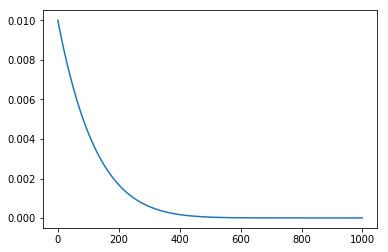

In [41]:
# lr_collect = []
# decay_steps = 1000
# power = 8
# for epoch in range(0,1000):
#     decayed_learning_rate = (starter_learning_rate - end_learning_rate) * \
#                             (1 - epoch / decay_steps) ** (power) + \
#                             end_learning_rate
#     lr_collect.append(decayed_learning_rate)
# plt.plot(lr_collect)

In [20]:
# import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="0"


# model = protoNet(h_dim, z_dim)

# n_epochs = 1000
# n_episodes = 50#0
# tr_losses, val_losses, accuracies = [], [], []
# for epoch in range(1,n_epochs):
#     start_time = time.time()
#     if (epoch+1)%20 == 0:
#         decayed_learning_rate = (starter_learning_rate - end_learning_rate) * \
#                             (1 - epoch / decay_steps) ** (power) + \
#                             end_learning_rate
# #     global_step.assign(global_step+1)
#         lr_rate.assign(decayed_learning_rate)
# #         tf.train.polynomial_decay(starter_learning_rate, epoch, decay_steps, end_learning_rate, power=0.5)
# #     )
#     losses = []
#     for epi in range(n_episodes):
#         support, query, labels = get_batch(train, n_way, n_shot, n_query)
               
#         gradients, loss = compute_gradients(model, support, query, labels, 
#                                 num_classes, num_support, num_queries, emb_dim)
# #         apply_gradients(optimizer, gradients, model.variables)
#         optimizer.apply_gradients(zip(gradients, model.variables), 
# #                               global_step=global_step)
#                               global_step=tf.train.get_or_create_global_step())
        
#         losses.append(loss.numpy())
        
#     if (epoch+1)%50 == 0:
#         root.save(checkpoint_prefix)

# #         if epi % 24 == 0:
# #             print("epoch: {} episode: {} loss: {}".format(epoch, epi, loss))
        
#     support, query, labels = get_batch(val, n_way, n_shot, n_query)
#     val_loss, val_acc = compute_loss_acc(model, support, query, labels, 
#                                 n_way, num_support, num_queries, emb_dim)
    
#     if (epoch)%50 == 0:
# #         print(decayed_learning_rate)
#         print("epoch: {}, lr_rate: {}, tr_loss: {}, val_loss: {}, val_acc: {}".format(
#             epoch, np.round(lr_rate.numpy(),4), 
#             np.round(np.mean(losses),3), np.round(val_loss.numpy(),3), 
#             np.round(val_acc.numpy(),3)
#         ))
#     tr_losses.append(np.mean(losses))
#     val_losses.append(val_loss)
#     accuracies.append(val_acc)
    
# #     print(time.time() - start_time)    

print((time.time()-global_start_time)/3600, " hour")


epoch: 50, lr_rate: 0.009800000116229057, tr_loss: 1.6089999675750732, val_loss: 0.6930000185966492, val_acc: 0.5
epoch: 100, lr_rate: 0.009499999694526196, tr_loss: 1.6089999675750732, val_loss: 0.6930000185966492, val_acc: 0.550000011920929
epoch: 150, lr_rate: 0.00930000003427267, tr_loss: 1.6089999675750732, val_loss: 0.6930000185966492, val_acc: 0.43299999833106995
epoch: 200, lr_rate: 0.008999999612569809, tr_loss: 1.6089999675750732, val_loss: 0.6930000185966492, val_acc: 0.44999998807907104
epoch: 250, lr_rate: 0.008700000122189522, tr_loss: 1.6069999933242798, val_loss: 0.6930000185966492, val_acc: 0.46700000762939453
epoch: 300, lr_rate: 0.00839999970048666, tr_loss: 1.6069999933242798, val_loss: 0.6919999718666077, val_acc: 0.5170000195503235
epoch: 350, lr_rate: 0.008100000210106373, tr_loss: 1.6039999723434448, val_loss: 0.6959999799728394, val_acc: 0.44999998807907104
epoch: 400, lr_rate: 0.007799999788403511, tr_loss: 1.6089999675750732, val_loss: 0.6930000185966492, val

In [21]:
tr_losses = np.array(tr_losses)
val_losses = np.array(val_losses)
accuracies = np.array(accuracies)

np.save('tr_losses_segment.npy',tr_losses)
np.save('val_losses_segment.npy',val_losses)
np.save('accuracies_segment.npy',accuracies)



Text(0.5, 1.0, 'accuracies')

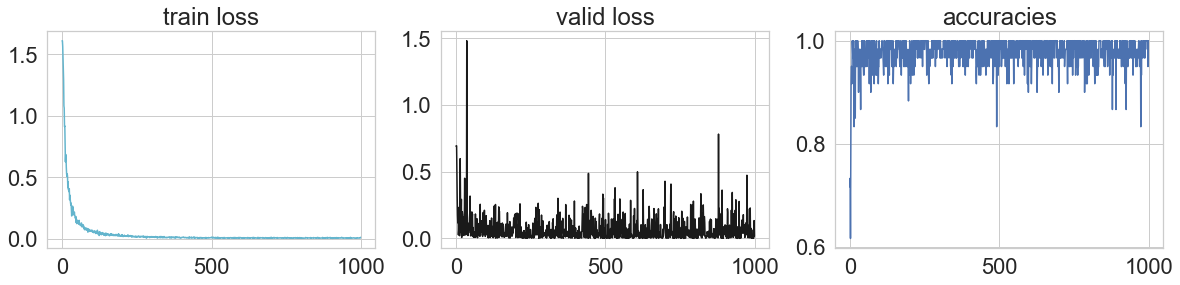

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', 
        font_scale=2, color_codes=True, rc=None)

tr_losses = np.load('tr_losses_segment.npy')
val_losses = np.load('val_losses_segment.npy')
accuracies = np.load('accuracies_segment.npy')


# tr_losses = np.array(tr_losses)
# val_losses = np.array(val_losses)

fig, ax = plt.subplots(1,3, figsize=(20,4))

ax[0].plot(range(tr_losses.shape[0]),tr_losses,'c')
ax[0].set_title('train loss')
ax[1].plot(range(val_losses.shape[0]), val_losses,'k')
ax[1].set_title('valid loss')
ax[2].plot(range(accuracies.shape[0]), accuracies,'b')
ax[2].set_title('accuracies')


In [1]:
import os, glob
from PIL import Image
path_add = []
for dir_ in os.listdir('../datasets-all/segment/amazon-lab/'):
    path_add.append(glob.glob('../datasets-all/segment/amazon-lab/'+dir_+'/*')[0])
len(path_add)

40

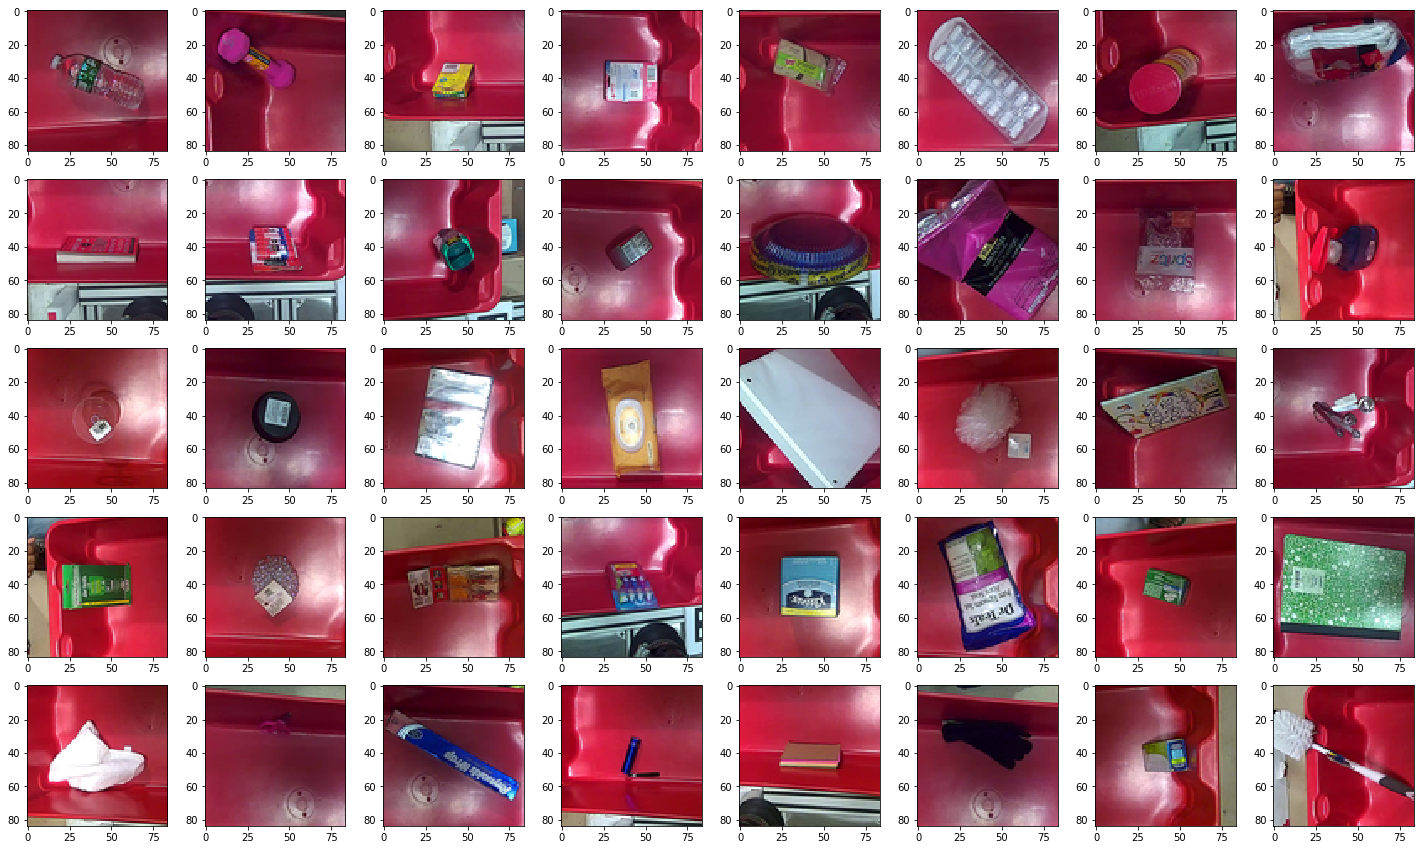

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', 
#         font_scale=2, color_codes=True, rc=None)

# pick 20 random images from different classes
# ids = np.random.randint(0,33,size=(20))
fig, ax = plt.subplots(5,8, figsize=(25,15))
axes = ax.flatten()
for i in range(40):
    axes[i].imshow(Image.open(path_add[i]))

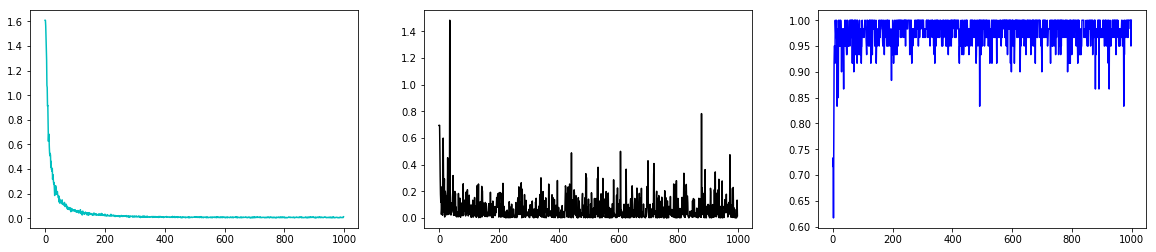

In [31]:
# tr_losses = np.array(tr_losses)
# val_losses = np.array(val_losses)

fig, ax = plt.subplots(1,3, figsize=(20,4))

ax[0].plot(range(tr_losses.shape[0]),tr_losses,'c')
ax[1].plot(range(val_losses.shape[0]), val_losses,'k')
ax[2].plot(range(accuracies.shape[0]), accuracies,'b')

In [27]:
# #
test_losses = []
test_acc_ = []
for i in range(100):
    support, query, labels = get_batch(test, n_way, n_shot, n_query)
    test_loss, test_acc = compute_loss_acc( model, support, query, labels, 
                                n_way, num_support, num_queries, emb_dim)
    
    test_losses.append(test_loss.numpy())
    test_acc_.append(test_acc.numpy())
#     print("itr: ",i,"acc:",test_acc.numpy())
    
test_losses = np.array(test_losses)
test_acc = np.array(test_acc_)

# np.save('test_loss_segment.npy', test_losses)
np.save('test_acc_segment.npy', test_acc)

print("test losses:",np.mean(test_losses))
print("test acc:",np.mean(test_acc))




test losses: 0.14824179
test acc: 0.9634167


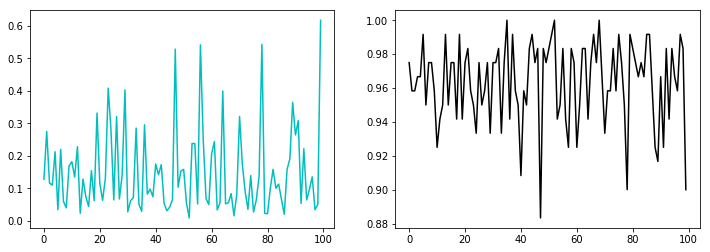

In [32]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(test_losses,'c')
ax[1].plot(test_acc,'k')

In [21]:
!jupyter nbconvert protoNet-tiny-Segment-data-aug-recheck.ipynb --to python

[NbConvertApp] Converting notebook protoNet-tiny-Segment-data-aug-recheck.ipynb to python
[NbConvertApp] Writing 43279 bytes to protoNet-tiny-Segment-data-aug-recheck.py


## restoring

In [ ]:
# checkpoint_path = tf.train.latest_checkpoint(‘checkpoints’)
# saver.restore(checkpoint_path)